# Objectives

To predict if a job description is fraudulent or real, by analyzing various features of Fake Job Description Prediction dataset and building a predictive model.

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

Dataset is available on be Kaggle, https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

# DataSet

In [1]:
#importing libraries..
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing 
import string
from sklearn.model_selection import train_test_split

In [2]:
#Loading data frame...
df = pandas.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.shape

(17880, 18)

# Preprocessing data

In [4]:
#percentage of null values in each column
df.isna().sum()/len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

salary range and department columns have >50% missing data. 
Job id is just indexing and dosent have any impact on target column.
location might not determine if a job posting is fake
so dropping these columns

In [6]:
#dropping unwanted columns..
df = df.drop(labels = ['job_id','salary_range','location',
                    'department'], axis = 1)

numerical columns dosent seem to have missing values.Since only categorical columns have NAN values,replacing them with " "

In [7]:
#replacing missing values with space..
df = df.fillna(" ",axis = 1)

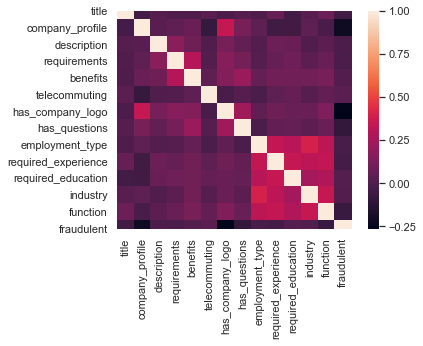

In [8]:
#correlation matrix..Heat Map
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# correlation 
encoded_data, _ = number_encode_features(df)
sns.heatmap(encoded_data.corr() , square = True)
plt.show()

'has_company_logo' column has least corelation with target column. so, dropping it.

In [9]:
df = df.drop(['has_company_logo'],axis=1)

"employment_type, required_experience, required_education, industry, function" categorical columns have repeated values and can be converted into numerical

In [10]:
columns = ['employment_type', 'required_experience', 'required_education', 'industry','function']
label_encoder = preprocessing.LabelEncoder() 

for i in columns:
    df[i]= label_encoder.fit_transform(df[i])

In [11]:
df.shape

(17880, 13)

In [12]:
#concatinating string columns into one text column
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

In [13]:
#dropping the above string columns..
df = df.drop(labels = ['title','company_profile','description','requirements','benefits'], axis = 1)

In [14]:
df.head()

,telecommuting,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,0,0,3,5,0,0,23,0,"Marketing Intern We're Food52, and we've creat..."
1,0,0,2,7,0,76,8,0,Customer Service - Cloud Video Production 90 S...
2,0,0,0,0,0,0,0,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,0,2,6,2,23,32,0,Account Executive - Washington DC Our passion ...
4,0,1,2,6,2,52,17,0,Bill Review Manager SpotSource Solutions LLC i...


In [15]:
df['text'].head(10)

0    Marketing Intern We're Food52, and we've creat...
1    Customer Service - Cloud Video Production 90 S...
2    Commissioning Machinery Assistant (CMA) Valor ...
3    Account Executive - Washington DC Our passion ...
4    Bill Review Manager SpotSource Solutions LLC i...
5    Accounting Clerk   Job OverviewApex is an envi...
6    Head of Content (m/f) Founded in 2009, the Fon...
7    Lead Guest Service Specialist    Airenvy’s mis...
8    HP BSM SME Solutions3 is a woman-owned small b...
9    Customer Service Associate - Part Time  Novite...
Name: text, dtype: object

In [16]:
#removing punctions from text column...

def remove(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '').replace('’','')
    return text

df["text"] = df['text'].apply(remove)

In [17]:
df['text'].head(10)

0    Marketing Intern Were Food52 and weve created ...
1    Customer Service  Cloud Video Production 90 Se...
2    Commissioning Machinery Assistant CMA Valor Se...
3    Account Executive  Washington DC Our passion f...
4    Bill Review Manager SpotSource Solutions LLC i...
5    Accounting Clerk   Job OverviewApex is an envi...
6    Head of Content mf Founded in 2009 the Fonpit ...
7    Lead Guest Service Specialist    Airenvys miss...
8    HP BSM SME Solutions3 is a womanowned small bu...
9    Customer Service Associate  Part Time  Novitex...
Name: text, dtype: object

In [18]:
#removing the stop words from text column..

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
for row in df.text:
    for word in row:
        if word in stop_words:
            row.replace(word, '')

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df.text)

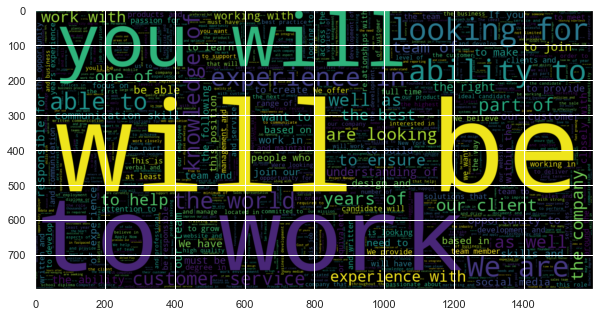

In [20]:
#printing word space..

from wordcloud import WordCloud

plt.figure(figsize = (10,10)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

# Multinomial Naive Bayes - with vectors and target columns (Supervised)

In [21]:
#test - train data split...
x = vectors
y = df.fraudulent
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [23]:
#Model building...

nb = MultinomialNB().fit(x_train, y_train)
nb.predict(x_test)

#Accuracy score...
print('Accuracy: {:.2f}'.format(nb.score(x_test, y_test)))

Accuracy: 0.95


# KMean clustering (Unsupervised)

Converting the vectors column into numerical labels..

In [24]:
#model built...
kmeans = KMeans(n_clusters=2, random_state=0)
vec = kmeans.fit(vectors)

In [25]:
#predicted output..
vec.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
#inserting above obtained label column and dropping vectors column from dataframe...

df['labels'] = vec.labels_
df = df.drop(labels = ['text'], axis = 1)
df.head()

,telecommuting,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,labels
0,0,0,3,5,0,0,23,0,1
1,0,0,2,7,0,76,8,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,2,6,2,23,32,0,1
4,0,1,2,6,2,52,17,0,1


In [27]:
#test - train data split...
x = df.drop(['fraudulent'],axis=1)
y = df.fraudulent
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Random Forest (supervised)

In [28]:
#model built...
rfc = RandomForestClassifier(max_depth=50, random_state=0,oob_score = True,max_features= 7,min_samples_split= 10,min_samples_leaf = 5)
rfc.fit(x_train, y_train)

#printing accuracy score..
print('Accuracy: {:.2f}'.format(rfc.score(x_test, y_test)))

Accuracy: 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# Logistic Regression

below two model have variation in accuracy due to change in perameters

In [29]:
#model built with 'newton-cg' solver

lr1 = LogisticRegression(solver='newton-cg',class_weight='balanced',intercept_scaling =2)
lr1.fit(x_train, y_train)
print('Accuracy: {:.2f}'.format(lr1.score(x_test, y_test)))

Accuracy: 0.60


In [30]:
#model built with 'lbfgs' solver

lr2 = LogisticRegression(solver='lbfgs',intercept_scaling =2)
lr2.fit(x_train, y_train)
print('Accuracy: {:.2f}'.format(lr2.score(x_test, y_test)))

Accuracy: 0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Summary

Multinomial Naive Bayes model gave 95% accuracy with input only vectors

Random forest model gave accuracy of 97% taking all valid features

Logistic Regression gave 95% acuuracy with 'lbfgs' solver and 60% accuracy with 'newton-cg' solver.

For the dataset random forest gives the best accuracy. As the target values have more than 95% 1's and <5% 0's, accuracy is much higher.

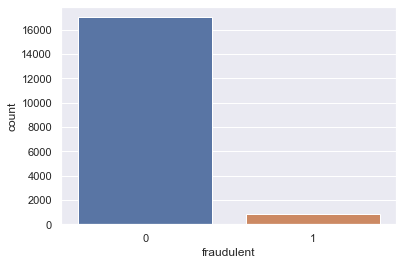

In [5]:
# data visualization of target column..

sns.set(style="darkgrid")
sns.countplot(x = "fraudulent" , data = df)
plt.show()